<a href="https://colab.research.google.com/github/Satwik-1234/Gooble-collab-Scripts-/blob/main/Rainfall_trend_Analysis_Ghod_river_basin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mann-Kendall Test Results:
Z: 2.4651
P-value: 0.0137
Trend: increasing
S: 1113
Var(S): 203858.33
Number of observations: 122


Linear Regression Results:
Slope: 0.2935 mm/day
R²: 0.0302
P-value (slope test): 0.0554
Intercept: 26.5599
Standard Error: 0.1517




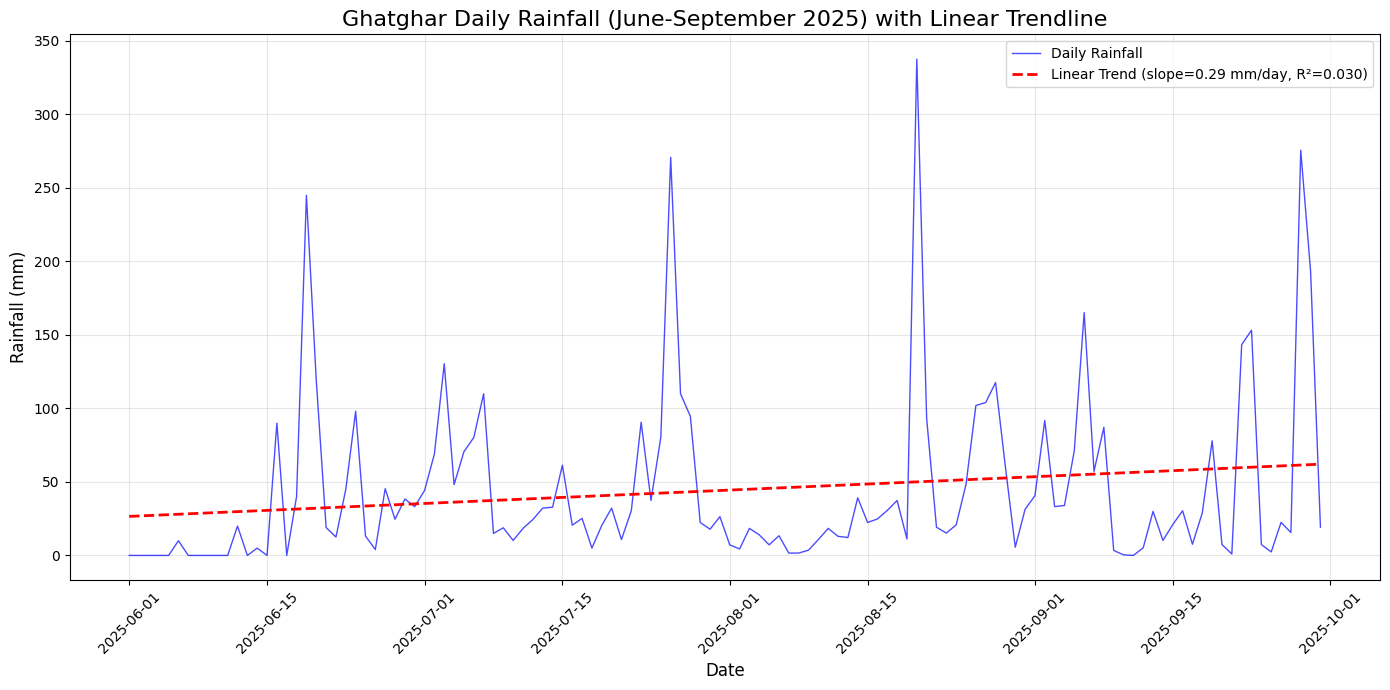

Data Summary:
                      Date    Rainfall
count                  122  122.000000
mean   2025-07-31 12:00:00   44.316639
min    2025-06-01 00:00:00    0.000000
25%    2025-07-01 06:00:00    7.450000
50%    2025-07-31 12:00:00   22.425000
75%    2025-08-30 18:00:00   55.000000
max    2025-09-30 00:00:00  337.600000
std                    NaN   59.685365


In [5]:
# Install if needed (usually pre-installed in Colab)
# !pip install numpy pandas matplotlib scipy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from collections import Counter
from scipy.stats import norm

# Your updated rainfall data (June to September 2025)
rainfall = [0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 20, 0, 5, 0, 90, 0, 40, 245, 119.1, 19, 12.5, 45, 98.1, 13.2, 4, 45.4, 24.6, 38.4, 33.2,  # June
            44.2, 69, 130.4, 48.2, 70.6, 80.2, 110, 15, 18.8, 10.2, 18.4, 24.4, 32.2, 32.8, 61.4, 20.6, 25.2, 5, 20.4, 32.2, 10.8, 30.4, 90.6, 37.4, 80.4, 270.8, 110, 94.6, 22.4, 17.8, 26.4,  # July
            7.2, 4.4, 18.4, 14, 7.2, 13.4, 1.6, 1.6, 3.6, 10.8, 18.4, 13, 12.2, 39.2, 22.45, 24.8, 30.6, 37.4, 11.2, 337.6, 93.2, 19.2, 15.2, 20.8, 48.4, 102, 104, 117.6, 60.2, 5.6, 31.4,  # August
            40.6, 91.8, 33.2, 34, 71.4, 165.2, 57.2, 87.2, 3.4, 0.4, 0, 5.2, 30, 10.2, 21, 30.4, 7.6, 29, 78, 7.4, 1, 143.4, 153.2, 7.4, 2.4, 22.48, 15.6, 275.6, 193.2, 19.2]  # September
# Create DataFrame with dates
dates = pd.date_range(start='2025-06-01', periods=len(rainfall), freq='D')
df = pd.DataFrame({'Date': dates, 'Rainfall': rainfall})

# Mann-Kendall Trend Test Function
def mann_kendall_test(data):
    n = len(data)
    s = sum(1 if data[j] > data[i] else -1 if data[j] < data[i] else 0
            for i in range(n) for j in range(i+1, n))
    counter = Counter(data)
    total_ties = sum(t * (t - 1) * (2 * t + 5) for t in counter.values())
    var_s = (n * (n - 1) * (2 * n + 5) - total_ties) / 18.0
    z = s / np.sqrt(var_s) if var_s > 0 else 0
    p_value = 2 * (1 - norm.cdf(abs(z)))
    trend = 'increasing' if z > 0 else 'decreasing' if z < 0 else 'no trend'
    return z, p_value, trend, s, var_s

# Run the Mann-Kendall Test
z, p, trend_mk, S, var_s = mann_kendall_test(rainfall)
print(f"Mann-Kendall Test Results:")
print(f"Z: {z:.4f}")
print(f"P-value: {p:.4f}")
print(f"Trend: {trend_mk}")
print(f"S: {S}")
print(f"Var(S): {var_s:.2f}")
print(f"Number of observations: {len(rainfall)}")
print("\n" + "="*50 + "\n")

# Linear Regression for Slope and R²
days = np.arange(len(df))
slope, intercept, r_value, p_value_lin, std_err = linregress(days, df['Rainfall'])
r_squared = r_value**2
print(f"Linear Regression Results:")
print(f"Slope: {slope:.4f} mm/day")
print(f"R²: {r_squared:.4f}")
print(f"P-value (slope test): {p_value_lin:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"Standard Error: {std_err:.4f}")
print("\n" + "="*50 + "\n")

# Plot: Time Series with Linear Trendline
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Rainfall'], 'b-', alpha=0.7, linewidth=1, label='Daily Rainfall')
trendline = slope * days + intercept
plt.plot(df['Date'], trendline, 'r--', linewidth=2, label=f'Linear Trend (slope={slope:.2f} mm/day, R²={r_squared:.3f})')
plt.title('Ghatghar Daily Rainfall (June-September 2025) with Linear Trendline', fontsize=16)
plt.ylabel('Rainfall (mm)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Quick Summary Stats
print("Data Summary:")
print(df.describe())

Mann-Kendall Test Results:
Z: 3.1881
P-value: 0.0014
Trend: increasing
S: 1438
Var(S): 203444.67
Number of observations: 122


Linear Regression Results:
Slope: 0.3322 mm/day
R²: 0.0438
P-value (slope test): 0.0207
Intercept: 20.2021
Standard Error: 0.1417




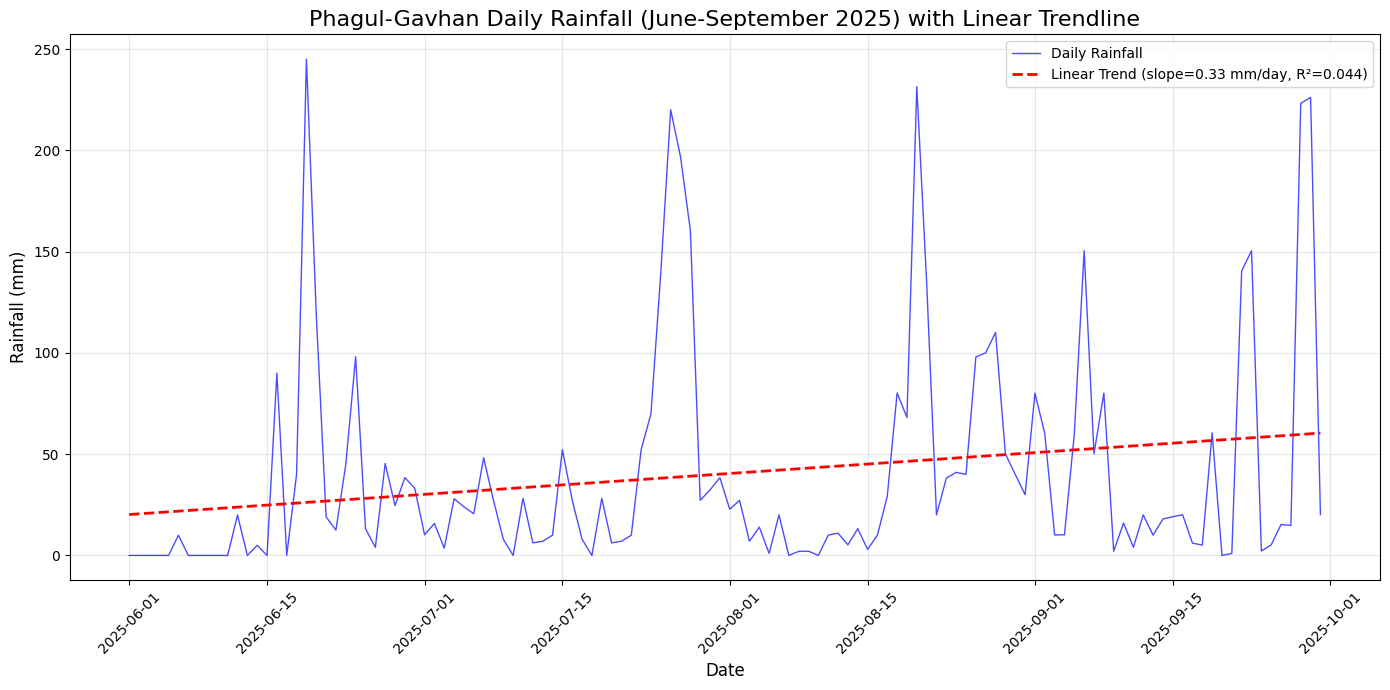

Data Summary:
                      Date    Rainfall
count                  122  122.000000
mean   2025-07-31 12:00:00   40.298852
min    2025-06-01 00:00:00    0.000000
25%    2025-07-01 06:00:00    5.200000
50%    2025-07-31 12:00:00   19.550000
75%    2025-08-30 18:00:00   47.500000
max    2025-09-30 00:00:00  245.000000
std                    NaN   56.126729


In [7]:
# Install if needed (usually pre-installed in Colab)
# !pip install numpy pandas matplotlib scipy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from collections import Counter
from scipy.stats import norm

# Your new rainfall data (June to September 2025)
rainfall = [0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 20, 0, 5, 0, 90, 0, 40, 245, 119.1, 19, 12.5, 45, 98.1, 13.2, 4, 45.4, 24.6, 38.4, 33.2,  # June
            10.2, 15.8, 3.6, 28, 24, 20.6, 48.2, 27.2, 8, 0, 28.2, 6.2, 7, 10, 52.2, 27.2, 8, 0, 28.2, 6.2, 7, 10, 52.2, 70, 140, 220, 196.8, 160.4, 27.2, 32.4, 38.4,  # July
            22.8, 27.2, 7, 14, 1, 20, 0, 2, 2.1, 0, 10, 11, 5.2, 13.2, 3, 10, 29.2, 80.21, 68.1, 231.4, 134.8, 20, 38.2, 41, 40, 98, 100, 110.1, 50.1, 40, 30,  # August
            80.1, 60.2, 10.1, 10.2, 60, 150.4, 50.2, 80.1, 2.1, 16, 4, 20, 10, 18, 19.1, 20.1, 6.1, 5.1, 60.5, 0, 1, 140.5, 150.4, 2.2, 5.2, 15.29, 14.8, 223.2, 226.1, 20.16]  # September

# Create DataFrame with dates
dates = pd.date_range(start='2025-06-01', periods=len(rainfall), freq='D')
df = pd.DataFrame({'Date': dates, 'Rainfall': rainfall})

# Mann-Kendall Trend Test Function
def mann_kendall_test(data):
    n = len(data)
    s = sum(1 if data[j] > data[i] else -1 if data[j] < data[i] else 0
            for i in range(n) for j in range(i+1, n))
    counter = Counter(data)
    total_ties = sum(t * (t - 1) * (2 * t + 5) for t in counter.values())
    var_s = (n * (n - 1) * (2 * n + 5) - total_ties) / 18.0
    z = s / np.sqrt(var_s) if var_s > 0 else 0
    p_value = 2 * (1 - norm.cdf(abs(z)))
    trend = 'increasing' if z > 0 else 'decreasing' if z < 0 else 'no trend'
    return z, p_value, trend, s, var_s

# Run the Mann-Kendall Test
z, p, trend_mk, S, var_s = mann_kendall_test(rainfall)
print(f"Mann-Kendall Test Results:")
print(f"Z: {z:.4f}")
print(f"P-value: {p:.4f}")
print(f"Trend: {trend_mk}")
print(f"S: {S}")
print(f"Var(S): {var_s:.2f}")
print(f"Number of observations: {len(rainfall)}")
print("\n" + "="*50 + "\n")

#Linear Regression for Slope and R²
days = np.arange(len(df))
slope, intercept, r_value, p_value_lin, std_err = linregress(days, df['Rainfall'])
r_squared = r_value**2
print(f"Linear Regression Results:")
print(f"Slope: {slope:.4f} mm/day")
print(f"R²: {r_squared:.4f}")
print(f"P-value (slope test): {p_value_lin:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"Standard Error: {std_err:.4f}")
print("\n" + "="*50 + "\n")

# Plot: Time Series with Linear Trendline
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Rainfall'], 'b-', alpha=0.7, linewidth=1, label='Daily Rainfall')
trendline = slope * days + intercept
plt.plot(df['Date'], trendline, 'r--', linewidth=2, label=f'Linear Trend (slope={slope:.2f} mm/day, R²={r_squared:.3f})')
plt.title('Phagul-Gavhan Daily Rainfall (June-September 2025) with Linear Trendline', fontsize=16)
plt.ylabel('Rainfall (mm)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Quick Summary Stats
print("Data Summary:")
print(df.describe())

In [1]:
import numpy as np
from scipy.stats import linregress, norm
from collections import Counter

# Dataset 1 (Original)
rainfall1 = [0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 20, 0, 5, 0, 90, 0, 40, 245, 119.1, 19, 12.5, 45, 98.1, 13.2, 4, 45.4, 24.6, 38.4, 33.2,
             44.2, 69, 130.4, 48.2, 70.6, 80.2, 110, 15, 18.8, 10.2, 18.4, 24.4, 32.2, 32.8, 61.4, 20.6, 25.2, 5, 20.4, 32.2, 10.8, 30.4, 90.6, 37.4, 80.4, 270.8, 110, 94.6, 22.4, 17.8, 26.4,
             7.2, 4.4, 18.4, 14, 7.2, 13.4, 1.6, 1.6, 3.6, 10.8, 18.4, 13, 12.2, 39.2, 22.45, 24.8, 30.6, 37.4, 11.2, 337.6, 93.2, 19.2, 15.2, 20.8, 48.4, 102, 104, 117.6, 60.2, 5.6, 31.4,
             40.6, 91.8, 33.2, 34, 71.4, 165.2, 57.2, 87.2, 3.4, 0.4, 0, 5.2, 30, 10.2, 21, 30.4, 7.6, 29, 78, 7.4, 1, 143.4, 153.2, 7.4, 2.4, 22.48, 15.6, 275.6, 193.2, 19.2]

# Dataset 2 (Updated)
rainfall2 = [0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 20, 0, 5, 0, 90, 0, 40, 245, 119.1, 19, 12.5, 45, 98.1, 13.2, 4, 45.4, 24.6, 38.4, 33.2,
             10.2, 15.8, 3.6, 28, 24, 20.6, 48.2, 27.2, 8, 0, 28.2, 6.2, 7, 10, 52.2, 27.2, 8, 0, 28.2, 6.2, 7, 10, 52.2, 70, 140, 220, 196.8, 160.4, 27.2, 32.4, 38.4,
             22.8, 27.2, 7, 14, 1, 20, 0, 2, 2.1, 0, 10, 11, 5.2, 13.2, 3, 10, 29.2, 80.21, 68.1, 231.4, 134.8, 20, 38.2, 41, 40, 98, 100, 110.1, 50.1, 40, 30,
             80.1, 60.2, 10.1, 10.2, 60, 150.4, 50.2, 80.1, 2.1, 16, 4, 20, 10, 18, 19.1, 20.1, 6.1, 5.1, 60.5, 0, 1, 140.5, 150.4, 2.2, 5.2, 15.29, 14.8, 223.2, 226.1, 20.16]

def mann_kendall_test(data):
    n = len(data)
    s = sum(1 if data[j] > data[i] else -1 if data[j] < data[i] else 0 for i in range(n) for j in range(i+1, n))
    counter = Counter(data)
    total_ties = sum(t * (t - 1) * (2 * t + 5) for t in counter.values())
    var_s = (n * (n - 1) * (2 * n + 5) - total_ties) / 18.0
    z = s / np.sqrt(var_s) if var_s > 0 else 0
    p_value = 2 * (1 - norm.cdf(abs(z)))
    trend = 'increasing' if z > 0 else 'decreasing' if z < 0 else 'no trend'
    return z, p_value, trend, s, var_s

# Run for Dataset 1
print("Dataset 1 MK Results:")
z1, p1, trend1, s1, var1 = mann_kendall_test(rainfall1)
print(f"Z: {z1:.4f}, P: {p1:.4f}, Trend: {trend1}")

# Run for Dataset 2
print("\nDataset 2 MK Results:")
z2, p2, trend2, s2, var2 = mann_kendall_test(rainfall2)
print(f"Z: {z2:.4f}, P: {p2:.4f}, Trend: {trend2}")

# Linear for both (example for Dataset 2; repeat for 1)
days = np.arange(len(rainfall2))
slope2, _, r2, p_lin2, _ = linregress(days, rainfall2)
print(f"\nDataset 2 Linear: Slope={slope2:.4f}, R²={r2**2:.4f}, P={p_lin2:.4f}")

Dataset 1 MK Results:
Z: 2.4651, P: 0.0137, Trend: increasing

Dataset 2 MK Results:
Z: 3.1881, P: 0.0014, Trend: increasing

Dataset 2 Linear: Slope=0.3322, R²=0.0438, P=0.0207
